# Labeled YouTube Comment Data Analysis

This notebook performs filtering, cleaning, and exploration of recently hand-labeled data. Checking simple NLP models and looking at results of the DeepMoji model

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='once')

In [176]:
# Read in the processed data
directory = '~/Documents/GitHub/youtube-data/label-app/data/'
# Kristen's labels
processed_set1 = [33,118,124,125,119,32,26,18,30,24,126,25,31,102,2094,918,1713,468,
                 2398,665,492]
# Nathan's labels
processed_set2 = [0,1,10,104,124,34,64]
print(500*(len(processed_set1) + len(processed_set2)))
i=0
for coms in processed_set1:
    if i == 0:
        comments = pd.read_csv(directory+"comments_set_" + str(coms) + ".csv", index_col=0)
    else:
        temp_df = pd.read_csv(directory+"comments_set_" + str(coms) + ".csv", index_col=0)
        comments = comments.append(temp_df)
    i+=1

for coms in processed_set2:
    temp_df = pd.read_csv(directory+"comments_set_next_" + str(coms) + ".csv", index_col=0)
    comments = comments.append(temp_df)
print(len(processed_set1))
comments.head()

13500
20


,cid,text,time,author,clikes,cdislikes,video_id,desc,category
0,UgxJIXwZLEuc6E4yspJ4AaABAg,i think your name for your youtube accont make...,1 year ago,Tootie Kamins,29,0,-F_JZdohnio,['content'],['delicious']
1,Ugye0Hi357G1JLG7ao94AaABAg,nice and sweet,1 year ago,Ravi kumar,1,0,-F_JZdohnio,['other'],['other']
2,Ugwki4vPuKOqPnqfuHV4AaABAg.8gZ62W6ErAd8i55Oi90kSS,Marem MaRem مانو طيب هاد🍮هاد ازكا🥨,11 months ago,shahd taha,3,0,-F_JZdohnio,['other'],['other']
3,Ugznvkcu-l3C8vVY51d4AaABAg,Yummy,1 year ago,Gacha Angelica love,1,0,-F_JZdohnio,['content'],['delicious']
4,UgyjRGABUJs62pXCZP54AaABAg,El corazón,11 months ago,valeria torres Castillo,1,0,-F_JZdohnio,['other'],['other']


In [177]:
comments.shape

(13527, 9)

In [178]:
# Clean the data: Remove all useless comments
comments.dropna(inplace=True)
useless = comments[comments['desc'] == "['other']"]
comments = comments[comments['desc'] != "['other']"]
comments = comments[comments['desc'] != '-']
comments.head()

,cid,text,time,author,clikes,cdislikes,video_id,desc,category
0,UgxJIXwZLEuc6E4yspJ4AaABAg,i think your name for your youtube accont make...,1 year ago,Tootie Kamins,29,0,-F_JZdohnio,['content'],['delicious']
3,Ugznvkcu-l3C8vVY51d4AaABAg,Yummy,1 year ago,Gacha Angelica love,1,0,-F_JZdohnio,['content'],['delicious']
9,UgzxfCB4RvW-PS1pTMh4AaABAg,Very niceeeeee 😍😘😍😘,11 months ago,ARWIN S. B. KING,4,0,-F_JZdohnio,"['content', 'mood']","['entertaining', 'happy']"
12,UgyISMF0Sbi_Fljoi7B4AaABAg,Cool 😄,1 year ago,Azn Boi,1,0,-F_JZdohnio,"['content', 'mood']","['entertaining', 'excitement', 'happy']"
13,UgyDtnH9vBdGPbTVShh4AaABAg,Yum😜,1 year ago,Ramandeep Kaur,1,0,-F_JZdohnio,['content'],['delicious']


In [179]:
# How many potentially useful comments left?
comments.shape

(4553, 9)

In [180]:
from ast import literal_eval

# Separate into content, mood data
content_coms = comments[(comments['desc'] == "['content']") | (comments['desc'] == "['content', 'other']") | (comments['desc'] == "['other', 'content']")]
mood_coms = comments[(comments['desc'] == "['mood']") | (comments['desc'] == "['mood', 'other']") | (comments['desc'] == "['mood', 'content']")]
mixed_coms = comments[(comments['desc'] == "['content', 'mood']") | (comments['desc'] == "['mood', 'content']")]

content_coms['desc'] = 'content'
mood_coms['desc'] = 'mood'
mixed_coms['desc'] = 'mixed'

content_coms['category'] = content_coms['category'].apply(literal_eval)
mood_coms['category'] = mood_coms['category'].apply(literal_eval)
mixed_coms['category'] = mixed_coms['category'].apply(literal_eval)

/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<BarContainer object of 3 artists>

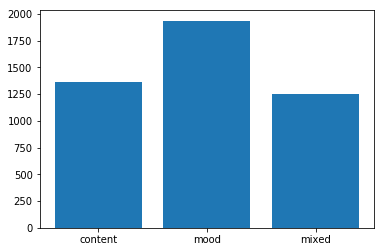

In [181]:
# Plot class abundances
import matplotlib.pyplot as plt

plt.bar(['content', 'mood', 'mixed'],[len(content_coms), len(mood_coms), len(mixed_coms)])

In [235]:
# Separate into subcategories
contents = ['informative', 'incorrect', 'delicious', 'entertaining', 'disgust',
            'weird', 'stupid', 'funny', 'question']


content_coms2 = pd.DataFrame({
      col:np.repeat(content_coms[col].values, content_coms['category'].str.len())
      for col in content_coms.columns.drop('category')}
    ).assign(**{'category':np.concatenate(content_coms['category'].values)})[content_coms.columns]
content_coms2 = content_coms2[content_coms2['category'].isin(contents)]
content_coms2.head()

,cid,text,time,author,clikes,cdislikes,video_id,desc,category
0,UgxJIXwZLEuc6E4yspJ4AaABAg,i think your name for your youtube accont make...,1 year ago,Tootie Kamins,29,0,-F_JZdohnio,content,delicious
1,Ugznvkcu-l3C8vVY51d4AaABAg,Yummy,1 year ago,Gacha Angelica love,1,0,-F_JZdohnio,content,delicious
2,UgyDtnH9vBdGPbTVShh4AaABAg,Yum😜,1 year ago,Ramandeep Kaur,1,0,-F_JZdohnio,content,delicious
3,Ugz0bOSlg_LfjXOEEpR4AaABAg,That all looks so delicious,1 year ago,andrea gilliane delos santos,1,0,-F_JZdohnio,content,delicious
4,UgwWUJjwfSMTuZxgm354AaABAg,I dont think I can eat any of these,1 year ago,Alexander Bolton,1,0,-F_JZdohnio,content,disgust


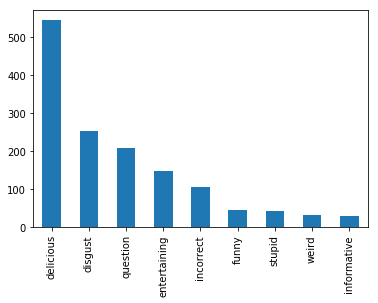

In [183]:
content_coms2['category'].value_counts().plot(kind='bar')

In [ ]:
content_coms2['category'].value_counts().plot(kind='bar')

In [234]:
moods = ['sarcasm', 'annoyance', 'anger', 'pity', 'sadness', 'relaxing', 'love',   
         'surprise', 'excitement', 'neutral', 'happy']

mood_coms2 = pd.DataFrame({
      col:np.repeat(mood_coms[col].values, mood_coms['category'].str.len())
      for col in mood_coms.columns.drop('category')}
    ).assign(**{'category':np.concatenate(mood_coms['category'].values)})[mood_coms.columns]
mood_coms2 = mood_coms2[mood_coms2['category'].isin(moods)]
mood_coms2.head()

,cid,text,time,author,clikes,cdislikes,video_id,desc,category
0,UgzZ18oxgsMMFvjh1qt4AaABAg,How to make a cake: \n\n\n\n\n\n\nGo to walma...,11 months ago,Steve Schaubroeck,1,0,-F_JZdohnio,mood,sarcasm
1,Ugyb7FC4oDirmlb3eoh4AaABAg,Wow,1 year ago,Alfredo Cervantes,1,0,-F_JZdohnio,mood,surprise
2,UgwuCvMQqcUhpeo6_jh4AaABAg,WOW my happy,1 year ago,유짜빈,1,0,-F_JZdohnio,mood,surprise
3,UgwuCvMQqcUhpeo6_jh4AaABAg,WOW my happy,1 year ago,유짜빈,1,0,-F_JZdohnio,mood,excitement
4,UgwuCvMQqcUhpeo6_jh4AaABAg,WOW my happy,1 year ago,유짜빈,1,0,-F_JZdohnio,mood,happy


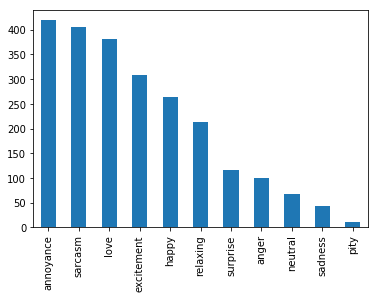

In [147]:
# Plot subcategory abundances
mood_coms2['category'].value_counts().plot(kind='bar')

In [44]:
# fasttext
import fastText

model = fastText.load_model('lid.176.bin')

useless['text'] = useless['text'].apply(lambda x: x.replace('\n',' '))
def pred_lang(text, model):
    return model.predict(text)[0][0].replace('__label__', '')

useless['lang'] = useless['text'].apply(lambda x: pred_lang(x, model))

NameError: name 'useless' is not defined

In [45]:
textwade = "Stoddart has pioneered the development of the use of molecular recognition and self-assembly processes in template-directed protocols for the synthesis of mechanically interlocked molecules, such as catenanes and rotaxanes."
model.predict(textwade)

(('__label__en',), array([0.9]))

In [197]:
len(useless)

8947

In [198]:
len(useless[useless['lang'] != 'en'])

2796

In [200]:
useless[useless['lang'] == 'en'].head()

,cid,text,time,author,clikes,cdislikes,video_id,desc,category,lang
1,Ugye0Hi357G1JLG7ao94AaABAg,nice and sweet,1 year ago,Ravi kumar,1,0,-F_JZdohnio,['other'],['other'],en
6,Ugz9DzBIiGDc1Gns1c54AaABAg,You know that no one see what you ride,1 year ago,Marie Madsen,1,0,-F_JZdohnio,['other'],['other'],en
7,UgwTLoWl_t80UeVrA4x4AaABAg,Are you selling the house,1 year ago,Zoe-Jane Hawyes,1,0,-F_JZdohnio,['other'],['other'],en
14,Ugy2AFRYY1LbCipeefR4AaABAg,I made that bear my son John loved that 😘🍰🎂🍪🍭🍬📍,1 year ago,Anirban Sarkar,1,0,-F_JZdohnio,['other'],['other'],en
19,UgxwMQs4LWZkd1p-aSR4AaABAg,Kim tuyen dau co an duoc sao lai nhung vao,1 year ago,Táo Đỏ,1,0,-F_JZdohnio,['other'],['other'],en


In [247]:
model.predict("Kim tuyen dau co an duoc sao lai nhung vao")

(('__label__en',), array([0.18731828]))

In [229]:
mixed_coms2 = pd.DataFrame({
      col:np.repeat(mixed_coms[col].values, mixed_coms['category'].str.len())
      for col in mixed_coms.columns.drop('category')}
    ).assign(**{'category':np.concatenate(mixed_coms['category'].values)})[mixed_coms.columns]
mixed_coms_mood2 = mixed_coms2[mixed_coms2['category'].isin(moods)]
mixed_coms_content2 = mixed_coms2[mixed_coms2['category'].isin(contents)]
mixed_coms2.head()

,cid,text,time,author,clikes,cdislikes,video_id,desc,category
0,UgzxfCB4RvW-PS1pTMh4AaABAg,Very niceeeeee 😍😘😍😘,11 months ago,ARWIN S. B. KING,4,0,-F_JZdohnio,mixed,entertaining
1,UgzxfCB4RvW-PS1pTMh4AaABAg,Very niceeeeee 😍😘😍😘,11 months ago,ARWIN S. B. KING,4,0,-F_JZdohnio,mixed,happy
2,UgyISMF0Sbi_Fljoi7B4AaABAg,Cool 😄,1 year ago,Azn Boi,1,0,-F_JZdohnio,mixed,entertaining
3,UgyISMF0Sbi_Fljoi7B4AaABAg,Cool 😄,1 year ago,Azn Boi,1,0,-F_JZdohnio,mixed,excitement
4,UgyISMF0Sbi_Fljoi7B4AaABAg,Cool 😄,1 year ago,Azn Boi,1,0,-F_JZdohnio,mixed,happy


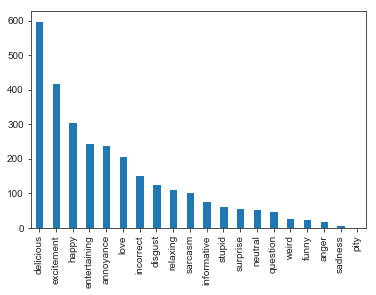

In [230]:
mixed_coms2['category'].value_counts().plot(kind='bar')

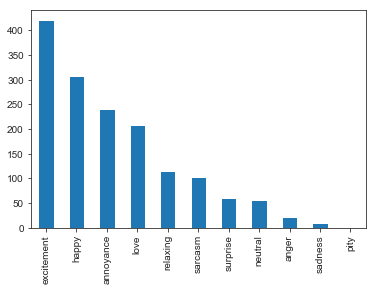

In [231]:
mixed_coms_mood2['category'].value_counts().plot(kind='bar')

In [240]:
# Write clean data to csv file
import pickle

keep_moods = ['excitement', 'relaxing', 'annoyance', 'sadness', 'sarcasm', 'surprise']
keep_conts = ['entertaining', 'incorrect','disgust','informative','stupid', 'question', 'weird','funny','delicious']

final_moods_pkl = pd.concat([mood_coms2[mood_coms2['category'].isin(keep_moods)], mixed_coms_mood2[mixed_coms_mood2['category'].isin(keep_moods)]])
final_contents_pkl = pd.concat([content_coms2[content_coms2['category'].isin(keep_conts)], mixed_coms_content2[mixed_coms_content2['category'].isin(keep_conts)]])
final_moods_pkl.tail()

,cid,text,time,author,clikes,cdislikes,video_id,desc,category
2892,Ugx9PiE45aImAKj01Gl4AaABAg,Delicious!!!,5 days ago,padussia,1,0,Cc6nTGOEmCA,mixed,excitement
2897,UgyV4XUg8WE9me_aaUh4AaABAg,I hate this video,4 months ago,abhi Tripathi,1,0,CcXTeR42cVg,mixed,annoyance
2899,UgwSkdwUbP1yJCbiMP14AaABAg,Wow....yummy.,4 months ago,Arnel Mandalunes,1,0,CcXTeR42cVg,mixed,excitement
2907,UgwH-jekQ8kyN6rMX0x4AaABAg,(I am sorry) but this is so fucking disgusting...,2 months ago,Nikolay Nikolaev,1,0,CcXTeR42cVg,mixed,annoyance
2909,Ugz6YJOwTK1t_5ajold4AaABAg,Kawara Fattah! A dish i tried in egypt and is...,4 months ago,Jahe Raiya,1,0,CcXTeR42cVg,mixed,excitement


In [241]:
final_contents_pkl.tail()

,cid,text,time,author,clikes,cdislikes,video_id,desc,category
2904,UgzXv-gTMmZJfqURsQV4AaABAg,These girls are true food lovers and serious e...,5 days ago,sougounaradjan ramalingam,1,0,Cc6nTGOEmCA,mixed,delicious
2906,UgwH-jekQ8kyN6rMX0x4AaABAg,(I am sorry) but this is so fucking disgusting...,2 months ago,Nikolay Nikolaev,1,0,CcXTeR42cVg,mixed,disgust
2908,Ugz6YJOwTK1t_5ajold4AaABAg,Kawara Fattah! A dish i tried in egypt and is...,4 months ago,Jahe Raiya,1,0,CcXTeR42cVg,mixed,delicious
2910,UgyZYNJAxlgJQW4MPUR4AaABAg,I love making beef jelly out of cow and pig fe...,1 month ago,Nadia Waugh,2,0,CcXTeR42cVg,mixed,delicious
2912,UgwLA79sbMrkwUPe66x4AaABAg,Good working girls respectful cooking girl in ...,6 days ago,Mehar Sayeed,1,0,Cc6nTGOEmCA,mixed,delicious


In [242]:
final_contents_pkl.to_pickle('comments_labeled_content_py2.pkl', protocol=2)
final_moods_pkl.to_pickle('comments_labeled_mood_py2.pkl', protocol=2)

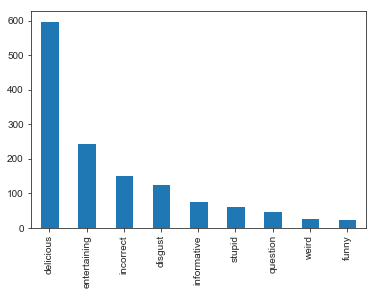

In [243]:
mixed_coms_content2['category'].value_counts().plot(kind='bar')

## Clean & tokenize comments

In [244]:
from tqdm import tqdm
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Functions
def rem_emoji(comment, emojis):
    cleaned = comment
    for e in emojis:
        cleaned = cleaned.replace(e, "")
    return cleaned

en_stops = set(stopwords.words('english'))

ws_tokenizer = WhitespaceTokenizer()

def clean_comments(text):
    text = re.sub(r'[?|!|\'|"|#]',r'',text)
    text = re.sub(r'[.|,|)|(|\|/]',r' ',text)
    text = text.replace("@","").replace("&","").replace(":","").replace("\"","").replace("/","").replace("''","")
    text = text.replace("â€œ","").replace("â€˜","").replace("*","").replace("’","").replace("\n","").replace("$","")
    text = text.lower()
    
    if not bool(set(text.split()) & set(en_stops)):
        return None
    
    new_text = ""
    for word in text.split():
        tmp_word = re.sub('[^a-z A-Z]+', ' ', word)
        new_text += tmp_word + " "
    new_text = new_text.strip()

    return new_text

def tokenize_text(text):
    tokens = []
    for word in nltk.word_tokenize(text):
        if len(word) < 2 or word in en_stops:
            continue
        tokens.append(word.lower())
    return tokens

def lemmat_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word))
    return new_words

In [207]:
mood_coms2['cl_text'] = mood_coms2['text'].apply(clean_comments)
mood_coms2.dropna(inplace=True)
mood_coms2['tk_text'] = mood_coms2['cl_text'].apply(tokenize_text)
mood_coms2.dropna(inplace=True)
mood_coms2['lm_text'] = mood_coms2['tk_text'].apply(lemmat_list)
mood_coms2['lm_len'] = mood_coms2['lm_text'].apply(len)
mood_train = mood_coms2.loc[mood_coms2['lm_len'] > 2]
mood_train['fn_text'] = mood_train['lm_text'].apply(' '.join)

/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [209]:
print(mood_train.shape)
mood_train.head()

(1822, 14)


,cid,text,time,author,clikes,cdislikes,video_id,desc,category,cl_text,tk_text,lm_text,lm_len,fn_text
0,UgzZ18oxgsMMFvjh1qt4AaABAg,How to make a cake: \n\n\n\n\n\n\nGo to walma...,11 months ago,Steve Schaubroeck,1,0,-F_JZdohnio,mood,sarcasm,how to make a cake go to walmart and buy a cak...,"[make, cake, go, walmart, buy, cake, done, sor...","[make, cake, go, walmart, buy, cake, done, sor...",11,make cake go walmart buy cake done sorry ment ...
5,Ugz-llBWT3SyBRvB_RB4AaABAg,I can't even walk and you gays making cakes,1 year ago,Maria Rodaete,1,0,-F_JZdohnio,mood,sarcasm,i cant even walk and you gays making cakes,"[cant, even, walk, gays, making, cakes]","[cant, even, walk, gay, making, cake]",6,cant even walk gay making cake
9,Ugxb1A3x383LpHqzUr54AaABAg,I love the fluffy bear is so cute,1 year ago,zdenka Gunarova,1,0,-F_JZdohnio,mood,love,i love the fluffy bear is so cute,"[love, fluffy, bear, cute]","[love, fluffy, bear, cute]",4,love fluffy bear cute
11,Ugw8p5rPKjjQRkW0lER4AaABAg,The teddy bear cake take 3 days to finished......,1 year ago,Pika_TheKitty XD,1,0,-F_JZdohnio,mood,sarcasm,the teddy bear cake take days to finished bu...,"[teddy, bear, cake, take, days, finished, ate,...","[teddy, bear, cake, take, day, finished, ate, ...",11,teddy bear cake take day finished ate took one...
14,UgyYGOS89VCJW_FsGah4AaABAg,It is all fun and cooking until the recipes ru...,1 year ago,Cactus’ Legos,1,0,-F_JZdohnio,mood,sarcasm,it is all fun and cooking until the recipes ru...,"[fun, cooking, recipes, run]","[fun, cooking, recipe, run]",4,fun cooking recipe run


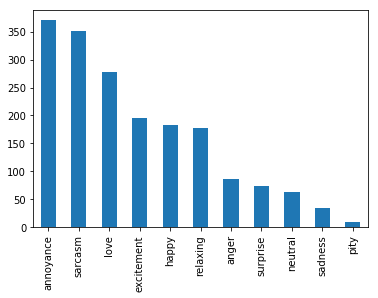

In [210]:
mood_train['category'].value_counts().plot(kind='bar')

In [211]:
categories_high = ['annoyance', 'sarcasm', 'love', 'relaxing', 'happy']

## Gensim

Checking word2vec again...

In [223]:
# Word2vec model for embeddings  
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA

# Defining the structure of our word2vec model 

# Size is the dimentionality feature of the model 
model_1 = Word2Vec(size=300, min_count=1)
#Feeding Our coupus 
model_1.build_vocab(mood_train['lm_text'])
#Lenth of the courpus 
total_examples = model_1.corpus_count

#traning our model
model_1.train(mood_train['lm_text'], total_examples=total_examples, epochs=10)

(156374, 176540)

/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


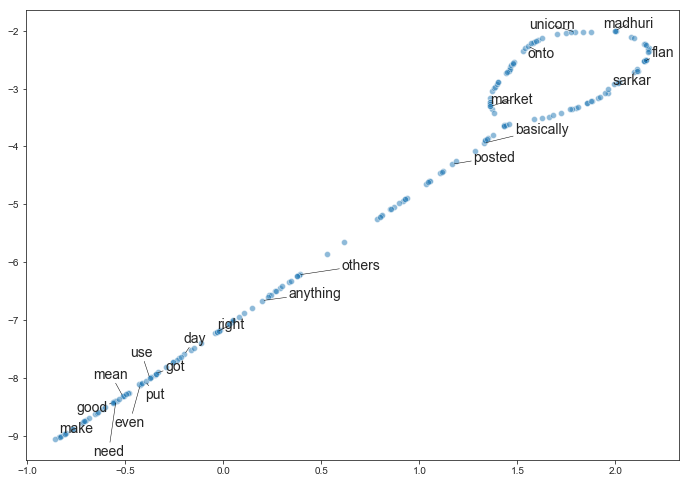

In [228]:
from sklearn.manifold import TSNE

df = model_1[model_1.wv.vocab]
words = list(model_1.wv.vocab)

# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model_1[word] for word in words if word in model_1.wv.vocab]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in words if word in model_1.wv.vocab]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a DataFrame
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.head(3)

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df[:200])
sns.set_style('ticks')
# Initialize figure
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 200, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

## TF-IDF 

Checking the basic log-reg model again...

In [212]:
# vectorize the articles and compute count matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

tf_vectorizer = TfidfVectorizer(max_features = 1000, ngram_range=(1,3))

In [218]:
# drop low categories
categories_high = ['annoyance', 'excitement', 'relaxing']
final_mood = mood_train[mood_train['text'] != ''][['cid','fn_text']]
final_mood = mood_train[mood_train['category'].isin(categories_high)]
final_mood = pd.concat([final_mood, pd.get_dummies(final_mood['category'])], axis=1)
final_mood.head()

,cid,text,time,author,clikes,cdislikes,video_id,desc,category,cl_text,tk_text,lm_text,lm_len,fn_text,annoyance,excitement,relaxing
21,UgxFxZZZVcBKpezy_4R4AaABAg.8fx5ssaN_ps8iNCbr4v4e-,Primitive Technology Records you need to appre...,11 months ago (edited),ncalipa,1,0,-F_JZdohnio,mood,excitement,primitive technology records you need to appre...,"[primitive, technology, records, need, appreci...","[primitive, technology, record, need, apprecia...",19,primitive technology record need appreciate su...,0,1,0
23,Ugx-I7saCJwZfo9XKO54AaABAg.8g7zKbYq6R88jUzW7Sj7eJ,prachi sarkar My mom can make them! My mom is ...,10 months ago (edited),Parishey Asif N.,1,0,-F_JZdohnio,mood,excitement,prachi sarkar my mom can make them my mom is a...,"[prachi, sarkar, mom, make, mom, expert, makin...","[prachi, sarkar, mom, make, mom, expert, makin...",21,prachi sarkar mom make mom expert making cake ...,0,1,0
27,UgxJIXwZLEuc6E4yspJ4AaABAg.8girma_m7778kNDWmUj79J,Do you meant \n\n\n\nSO COPPIYING OTHERS CONTE...,9 months ago,IItsYourGurl Glynnis,1,0,-F_JZdohnio,mood,annoyance,do you meant so coppiying others content cough...,"[meant, coppiying, others, content, cough, wai...","[meant, coppiying, others, content, cough, wai...",10,meant coppiying others content cough wait repo...,1,0,0
30,UgzTuEouwDCU-rSSk9t4AaABAg,I’ve seen the unicorn cake too much. Stop ✋,1 year ago,:3 :3,1,0,-F_JZdohnio,mood,annoyance,ive seen the unicorn cake too much stop,"[ive, seen, unicorn, cake, much, stop]","[ive, seen, unicorn, cake, much, stop]",6,ive seen unicorn cake much stop,1,0,0
31,UgxJq3Xx3V9ikBM_lwl4AaABAg,Do you have diabetes?? If you don't.. thank Go...,1 year ago,white Fijian Tongan.,1,0,-F_JZdohnio,mood,excitement,do you have diabetes if you dont thank god i n...,"[diabetes, dont, thank, god, need, someone, te...","[diabetes, dont, thank, god, need, someone, te...",9,diabetes dont thank god need someone teach bak...,0,1,0


In [219]:
# train on just the 3 classes
#finaldata = tf_vectorizer.fit_transform(finalemoji3['comment_clean'])
train, test = train_test_split(final_mood, random_state=42, test_size=0.33, shuffle=True)
X_train = train['fn_text']
ytrain = train.drop(labels=['cid', 'fn_text'], axis=1)
X_test = test['fn_text']
ytest = test.drop(labels=['cid', 'fn_text'], axis=1)

NB_pipeline = Pipeline([('tfidf', TfidfVectorizer(max_features = 1000, ngram_range=(1,3))),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'))),
            ])

# train the model using X_dtm & y
NB_pipeline.fit(X_train, ytrain[categories_high])
# compute the testing accuracy
prediction = NB_pipeline.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(ytest[categories_high], prediction)))

/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


Test accuracy is 0.5040650406504065


In [220]:
NB_pipeline = Pipeline([('tfidf', TfidfVectorizer(max_features = 1000, ngram_range=(1,3))),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

# train the model using X_dtm & y
NB_pipeline.fit(X_train, ytrain[categories_high])
# compute the testing accuracy
prediction = NB_pipeline.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(ytest[categories_high], prediction)))

/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


Test accuracy is 0.47560975609756095


# Check out DeepMoji Results

Loading the test results for deepmoji

## model 1

In [3]:
# Deepmoji results
dmoji = pd.read_csv('../../DeepMoji/deepmoji_text.csv', index_col=0)

In [4]:
dmoji.head()

,0,1,2,3,4,5,6,7,8,9,...,196,197,198,199,200,201,202,203,204,205
0,7,5,2,4,5,2,7,0,4,8,...,0,4,2,8,2,7,7,3,5,6
1,8,2,8,8,6,11,11,4,4,5,...,1,1,8,0,7,12,0,5,2,8


In [5]:
from sklearn.metrics import multilabel_confusion_matrix

mcm = multilabel_confusion_matrix(dmoji.iloc[0].values, dmoji.iloc[1].values, labels=range(9))

/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/kristenbrown/miniconda3/e

In [6]:
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
tp / (tp + fn)

array([0.13043478, 0.05882353, 0.10526316, 0.        , 0.25      ,
       0.29268293, 0.14285714, 0.04761905, 0.0952381 ])

In [7]:
tp / (tp+fp)

/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.27272727, 0.125     , 0.17391304,        nan, 0.13636364,
       0.22641509, 0.05405405, 0.5       , 0.07407407])

In [8]:
(2* ((tp / (tp+fp)) * (tp / (tp + fn))))/((tp / (tp + fn))+(tp / (tp+fp)))

/Users/kristenbrown/miniconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.17647059, 0.08      , 0.13114754,        nan, 0.17647059,
       0.25531915, 0.07843137, 0.08695652, 0.08333333])

## model 2

In [29]:
from sklearn.metrics import confusion_matrix
dmoji = pd.read_csv('../deepmoji_text_2.csv', index_col=0)
dmoji.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,3,1,2,2,3,3,3,0,2,0,...,2,2,1,0,1,3,3,1,1,3
1,3,1,1,2,3,1,3,0,2,0,...,2,2,1,2,1,3,3,1,1,3


In [36]:
mcm = multilabel_confusion_matrix(dmoji.iloc[0].values, dmoji.iloc[1].values, labels=range(4))
tn = mcm[:, 0, 0]
tp = mcm[:,1, 1]
fn = mcm[:,1, 0]
fp = mcm[:,0, 1]
rec = tp / (tp + fn)
prec = tp / (tp+fp)
f1 = 2*(rec*prec)/(rec+prec)
print(np.mean(prec))
print(np.mean(rec))
print(np.mean(f1))

0.6966991341991342
0.7022184804442868
0.6950905064908364


In [37]:
mcm

array([[[74,  6],
        [11, 15]],

       [[77,  8],
        [ 5, 16]],

       [[69,  9],
        [ 4, 24]],

       [[66,  9],
        [12, 19]]])

In [38]:
mcm = confusion_matrix(dmoji.iloc[0].values, dmoji.iloc[1].values, labels=range(4))

In [40]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix
[[0.58 0.04 0.08 0.31]
 [0.   0.76 0.19 0.05]
 [0.04 0.11 0.86 0.  ]
 [0.16 0.13 0.1  0.61]]


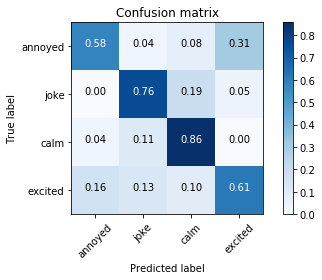

In [72]:
plt.figure()
plot_confusion_matrix(mcm, classes=["annoyed", "joke", "calm", "excited"],
                      normalize=True, title='Confusion matrix')
plt.savefig('confusion_model_3.png')